# Discussion Week 2 - Introduction to Pandas and Scikit-Learn

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tools4ds/fa2024/static_files/discussion_slides/student_performance.ipynb)

This Jupyter Notebook explores the relationship between various factors and student exam scores. The aim is to understand these relationships and predict exam scores using linear regression.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Let's begin by first reading the CSV file that contains the dataset.

In [3]:
df = pd.read_csv('StudentPerformanceFactors.csv')

#### We can then take a look at the shape of the dataset.

In [4]:
df.shape

(6607, 20)

In [51]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity,Exam_Score,study_efficiency
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,0.800209,7.034964,75.066165,2.972719,67.252117,3.808155
std,5.985460,0.115507,1.468033,14.400389,1.028926,3.914217,2.331463
min,1.000000,0.600000,4.000000,50.000000,0.000000,55.000000,1.613636
25%,16.000000,0.700000,6.000000,63.000000,2.000000,65.000000,2.840000
50%,20.000000,0.800000,7.000000,75.000000,3.000000,67.000000,3.368421
75%,24.000000,0.900000,8.000000,88.000000,4.000000,69.000000,4.133333
max,44.000000,1.000000,10.000000,100.000000,6.000000,101.000000,92.000000


#### In order to view the first 5 records of the dataset, we need to use the .head() function, and .tail() to view the last 5 records

In [5]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


#### To drop null values present in the dataset, we can use the .dropna() function.

In [6]:
df.dropna(inplace=True)

#### Let's take a look at the data types present in the dataset. 

In [7]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [52]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
       'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score', 'study_efficiency'],
      dtype='object')

#### Pandas allows you to reference a column similar to a python dictionary key, using column names in square brackets.
#### This returns a Series object, the other fundamental data structure in Pandas.

In [56]:
type(df['Hours_Studied'])  

pandas.core.series.Series

#### To just view the top 5 records of a particular column we can do as following

In [91]:
df['Hours_Studied'].head()

0    23
1    19
2    24
3    29
4    19
Name: Hours_Studied, dtype: int64

In [57]:
df[['Attendance', 'Parental_Involvement']].head()

,Attendance,Parental_Involvement
0,0.84,Low
1,0.64,Low
2,0.98,Medium
3,0.89,Low
4,0.92,Medium


#### To view the unique values along with their counts in a particular column, we can do as follows:

In [8]:
df['Access_to_Resources'].value_counts()

Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64

#### Retrieving a row of the DataFrame using integer-based indexing

In [9]:
df.iloc[0]

Hours_Studied                          23
Attendance                             84
Parental_Involvement                  Low
Access_to_Resources                  High
Extracurricular_Activities             No
Sleep_Hours                             7
Previous_Scores                        73
Motivation_Level                      Low
Internet_Access                       Yes
Tutoring_Sessions                       0
Family_Income                         Low
Teacher_Quality                    Medium
School_Type                        Public
Peer_Influence                   Positive
Physical_Activity                       3
Learning_Disabilities                  No
Parental_Education_Level      High School
Distance_from_Home                   Near
Gender                               Male
Exam_Score                             67
Name: 0, dtype: object

#### Converting attendance to a fraction of 100

In [10]:
df['Attendance'] = df['Attendance']/100

#### Adding a new column is as simple as shown below

In [13]:
df['study_efficiency'] = df['Exam_Score'] / df['Hours_Studied']

In [96]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,study_efficiency
0,23,0.84,Low,High,No,7,73,Low,Yes,0,...,Medium,Public,Positive,3,No,High School,Near,Male,67,2.913043
1,19,0.64,Low,Medium,No,8,59,Low,Yes,2,...,Medium,Public,Negative,4,No,College,Moderate,Female,61,3.210526
2,24,0.98,Medium,Medium,Yes,7,91,Medium,Yes,2,...,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,3.083333
3,29,0.89,Low,Medium,Yes,8,98,Medium,Yes,1,...,Medium,Public,Negative,4,No,High School,Moderate,Male,71,2.448276
4,19,0.92,Medium,Medium,Yes,6,65,Medium,Yes,3,...,High,Public,Neutral,4,No,College,Near,Female,70,3.684211


#### Deleting a row/column are shown in the following cells

In [14]:
#dropping a column
df.drop('Tutoring_Sessions', axis=1, inplace=True)

In [15]:
#dropping a row (given an index)
df.drop(0)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,study_efficiency
1,19,0.64,Low,Medium,No,8,59,Low,Yes,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61,3.210526
2,24,0.98,Medium,Medium,Yes,7,91,Medium,Yes,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74,3.083333
3,29,0.89,Low,Medium,Yes,8,98,Medium,Yes,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71,2.448276
4,19,0.92,Medium,Medium,Yes,6,65,Medium,Yes,Medium,High,Public,Neutral,4,No,College,Near,Female,70,3.684211
5,19,0.88,Medium,Medium,Yes,8,89,Medium,Yes,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71,3.736842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,0.69,High,Medium,No,7,76,Medium,Yes,High,Medium,Public,Positive,2,No,High School,Near,Female,68,2.720000
6603,23,0.76,High,Medium,No,8,81,Medium,Yes,Low,High,Public,Positive,2,No,High School,Near,Female,69,3.000000
6604,20,0.90,Medium,Low,Yes,6,65,Low,Yes,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68,3.400000
6605,10,0.86,High,High,Yes,6,91,High,Yes,Low,Medium,Private,Positive,3,No,High School,Far,Female,68,6.800000


#### Filtering a dataframe based on a condition

In [17]:
low_parental_involvement = df[df['Parental_Involvement'] == 'Low']
high_scorers = df[df['Exam_Score'] > 75]

In [18]:
low_parental_involvement.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,study_efficiency
0,23,0.84,Low,High,No,7,73,Low,Yes,Low,Medium,Public,Positive,3,No,High School,Near,Male,67,2.913043
1,19,0.64,Low,Medium,No,8,59,Low,Yes,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61,3.210526
3,29,0.89,Low,Medium,Yes,8,98,Medium,Yes,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71,2.448276
7,25,0.78,Low,High,Yes,6,50,Medium,Yes,High,High,Public,Negative,2,No,High School,Far,Male,66,2.640000
10,17,0.80,Low,High,No,8,88,Medium,No,Medium,High,Private,Neutral,4,No,College,Moderate,Male,68,4.000000


In [19]:
high_scorers.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,study_efficiency
94,18,0.89,High,Medium,Yes,4,73,Medium,Yes,High,Medium,Private,Positive,2,No,College,Near,Female,100,5.555556
106,31,1.00,Medium,Medium,No,7,59,Medium,Yes,High,High,Public,Positive,5,No,Postgraduate,Moderate,Male,76,2.451613
113,35,0.99,High,High,Yes,7,85,Low,Yes,Medium,High,Private,Neutral,2,No,Postgraduate,Near,Female,79,2.257143
209,43,0.86,High,Medium,Yes,7,97,Medium,Yes,Medium,High,Public,Positive,1,No,High School,Near,Female,78,1.813953
217,19,0.70,Medium,Low,No,7,54,High,Yes,Medium,Medium,Public,Positive,2,Yes,High School,Moderate,Male,89,4.684211


#### If we want to sort the dataframe in a particular order (ascending/descending) based on a particular column, we can do as follows

In [21]:
sorted_exam_score = df.sort_values(by='Exam_Score', ascending=False)

In [22]:
sorted_exam_score.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,study_efficiency
1525,27,0.98,Low,Medium,Yes,6,93,Low,No,High,High,Public,Positive,3,No,High School,Moderate,Female,101,3.740741
94,18,0.89,High,Medium,Yes,4,73,Medium,Yes,High,Medium,Private,Positive,2,No,College,Near,Female,100,5.555556
3579,14,0.90,High,High,Yes,8,86,Medium,Yes,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99,7.071429
2425,23,0.83,High,High,Yes,4,89,Low,Yes,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99,4.304348
6347,28,0.96,High,Low,Yes,4,98,High,Yes,High,High,Public,Positive,3,No,High School,Near,Male,98,3.500000


#### Using groupby, is a very powerful way of grouping 2 or more columns together and applying aggreagte functions to each group. It aids in the EDA process uncovering some really important insights pertaining to the dataset.
#### It is widely used in data analysis to summarize, filter, and transform data by grouping similar values.

In [23]:
#average exam score by gender
df.groupby('Gender')['Exam_Score'].mean()

Gender
Female    67.274721
Male      67.235629
Name: Exam_Score, dtype: float64

In [24]:
#median average score by teacher quality
df.groupby('Teacher_Quality')['Exam_Score'].median()

Teacher_Quality
High      68.0
Low       67.0
Medium    67.0
Name: Exam_Score, dtype: float64

#### We can apply a transformation after grouping few columns and use the lambda function to perform some computation, in this case we standardize the values of Exam Scores.

In [59]:
df.groupby('Family_Income')['Exam_Score'].transform(lambda x: (x-x.mean())/x.std())

0       0.038357
1      -1.664398
2       1.731796
3       0.948059
4       0.686813
          ...   
6602    0.037950
6603    0.560986
6604    0.299671
6605    0.299671
6606   -0.880661
Name: Exam_Score, Length: 6378, dtype: float64

#### Let's plot some results!!
#### We can use a combination of matplotlib and seaborn to plot some nice visualization of different statistical findings.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

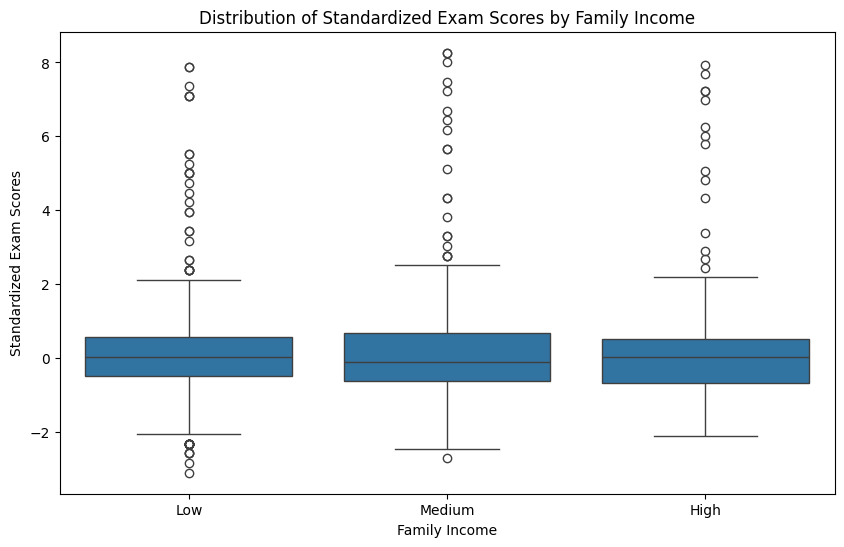

In [66]:
df['Standardized_Scores'] = df.groupby('Family_Income')['Exam_Score'].transform(lambda x: (x-x.mean())/x.std())

# Plot the standardized scores by Family Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Family_Income', y='Standardized_Scores', data=df)
plt.title('Distribution of Standardized Exam Scores by Family Income')
plt.xlabel('Family Income')
plt.ylabel('Standardized Exam Scores')
plt.show()

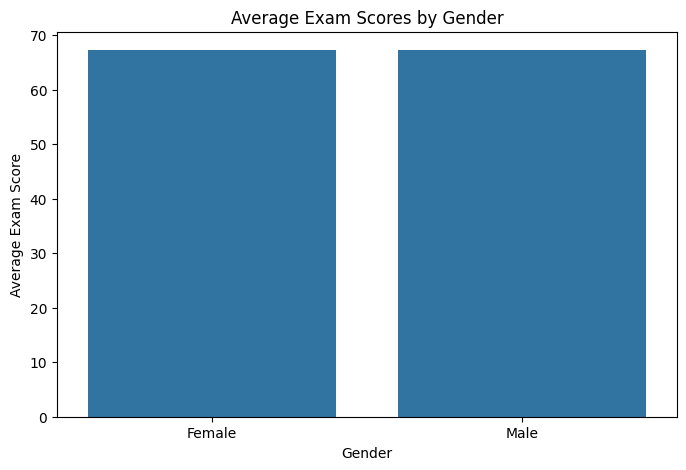

In [61]:
average_scores_gender = df.groupby('Gender')['Exam_Score'].mean().reset_index()

# Creating a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Exam_Score', data=average_scores_gender)
plt.title('Average Exam Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Exam Score')
plt.show()

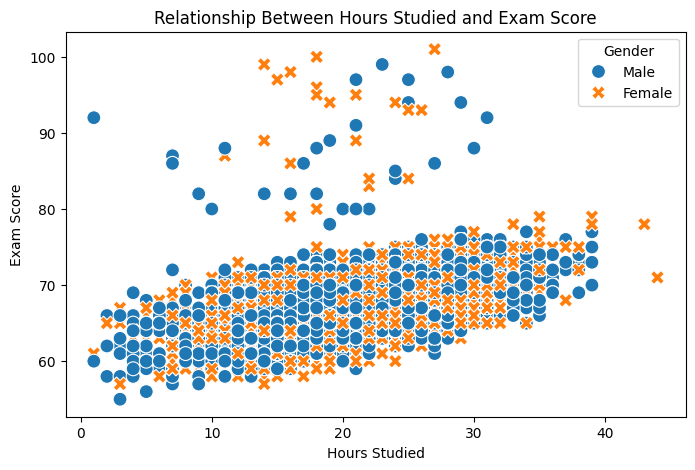

In [62]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, hue='Gender', style='Gender', s=100)
plt.title('Relationship Between Hours Studied and Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend(title='Gender')
plt.show()

C:\Users\Shreyas Sudarsan\AppData\Local\Temp\ipykernel_52120\1442975599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Parental_Involvement', data=df, palette='autumn')


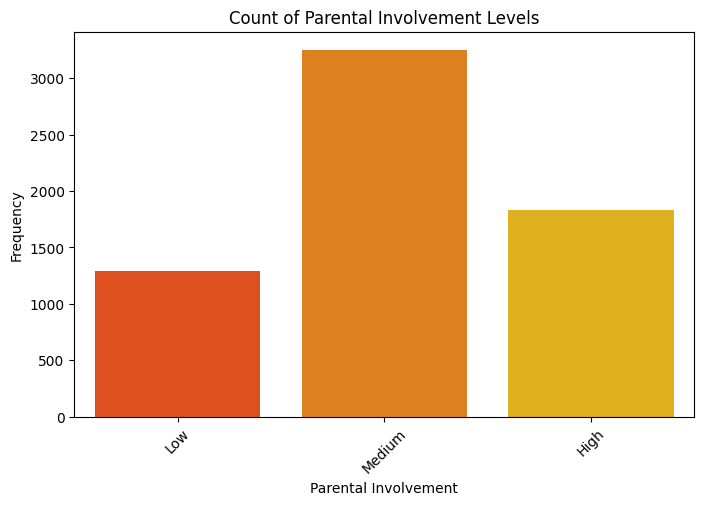

In [65]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Parental_Involvement', data=df, palette='autumn')
plt.title('Count of Parental Involvement Levels')
plt.xlabel('Parental Involvement')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Onto some Machine Learning!

#### Let's build a linear regression using sklearn

#### First we need to handle the categorical variables using One-Hot Encoding

In [32]:
cat_variables = df.select_dtypes(include=['object']).columns.tolist()
df_processed = pd.get_dummies(df, columns=cat_variables)

In [33]:
df_processed.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity,Exam_Score,study_efficiency,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23,0.84,7,73,3,67,2.913043,False,True,False,...,True,False,False,True,False,False,False,True,False,True
1,19,0.64,8,59,4,61,3.210526,False,True,False,...,True,False,True,False,False,False,True,False,True,False
2,24,0.98,7,91,4,74,3.083333,False,False,True,...,True,False,False,False,True,False,False,True,False,True
3,29,0.89,8,98,4,71,2.448276,False,True,False,...,True,False,False,True,False,False,True,False,False,True
4,19,0.92,6,65,4,70,3.684211,False,False,True,...,True,False,True,False,False,False,False,True,True,False


####  We can do the same as above using OneHotEncoder of the sklearn library

In [34]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)  
encoded_data = ohe.fit_transform(df[cat_variables])

In [35]:
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(cat_variables))

#### Joining the non categorical variable from the original to the encoded df

In [40]:
complete_encoded_df = pd.concat([df.drop(cat_variables, axis=1), encoded_df], axis=1)   

In [41]:
encoded_df.head()

,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Motivation_Level_High,Motivation_Level_Low,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [42]:
complete_encoded_df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Physical_Activity,Exam_Score,study_efficiency,Parental_Involvement_High,Parental_Involvement_Low,Parental_Involvement_Medium,...,Learning_Disabilities_No,Learning_Disabilities_Yes,Parental_Education_Level_College,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Far,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Female,Gender_Male
0,23.0,0.84,7.0,73.0,3.0,67.0,2.913043,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,19.0,0.64,8.0,59.0,4.0,61.0,3.210526,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,24.0,0.98,7.0,91.0,4.0,74.0,3.083333,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,29.0,0.89,8.0,98.0,4.0,71.0,2.448276,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,19.0,0.92,6.0,65.0,4.0,70.0,3.684211,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [43]:
complete_encoded_df.dropna(inplace=True)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = complete_encoded_df.drop('Exam_Score', axis=1)
y = complete_encoded_df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_test.shape)


(4929, 40)
(1233,)


In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_preds = model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_preds)

In [48]:
print(mse)

5.953621007619911


In [49]:
rmse = mean_squared_error(y_test, y_preds, squared=False)

g:\BU Stuff\DS701 - TA\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
print(rmse)

2.4400043048363482
